In [73]:
import sys
import requests as r
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [74]:
url = "https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2"
query1 = """query trades{
  swaps(where:{pair: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, orderBy: timestamp, orderDirection: desc, first: 1000) {
    id
    timestamp
    amount0In
    amount1In
    amount0Out
    amount1Out
    amountUSD
    pair {
      volumeUSD
    }
  }
}"""
query2 = """query tt{
  pairs(where: {id: "0xd3d2e2692501a5c9ca623199d38826e513033a17"}, orderBy: createdAtTimestamp, orderDirection: desc)
  {
    id
    token0{
      name
    }
    token1{
      name
    }
    totalSupply
    reserveUSD
    token0Price
    token1Price
    volumeUSD
    txCount
    liquidityProviderCount
    createdAtBlockNumber
  }
}"""

In [75]:
req = r.post(url, json={'query': query1})

In [76]:
print(req.status_code)
print(req.text)

200
{"data":{"swaps":[{"amount0In":"0","amount0Out":"3.619102212353056157","amount1In":"0.032","amount1Out":"0","amountUSD":"60.9623013949262861185166768938568","id":"0xdec6839e8e4b733cd16f5b1c92c8a6f8b5d8f7959bfc1da69dbaa10977718bf9-0","pair":{"volumeUSD":"6638525096.408655529855229938930996"},"timestamp":"1624510585"},{"amount0In":"0","amount0Out":"3.958406083977620306","amount1In":"0.035","amount1Out":"0","amountUSD":"66.67760611469315122337222179909474","id":"0x8dabb3871fdd85a256d84b211150f2ab353299c072896b56cd5710ac06702cb7-0","pair":{"volumeUSD":"6638525096.408655529855229938930996"},"timestamp":"1624510283"},{"amount0In":"16.3","amount0Out":"0","amount1In":"0","amount1Out":"0.14326098943751875","amountUSD":"272.7378237562892591226598316776867","id":"0x30f73f4f19b9ceb2c11fc4a14ab10628b055403bea60c268f8c6ef66fc5d12d4-0","pair":{"volumeUSD":"6638525096.408655529855229938930996"},"timestamp":"1624510191"},{"amount0In":"0","amount0Out":"3.61907492217935034","amount1In":"0.032","amoun

In [77]:
json_data = json.loads(req.text)
df_data = json_data['data']['swaps']
df = pd.DataFrame(df_data)

In [78]:
buy_side = []
base, quote = [], []

In [79]:
for a in df["amount0In"]:
    if (float(a) == 0):
        buy_side.append("Sell")
    else:
        buy_side.append("amount")

In [80]:
for a, b, c, d in zip(df["amount0In"], df["amount0Out"],df["amount1In"],df["amount1Out"]):
    temp = float(a) + float(b)
    base.append(temp)
    tt = float(c) + float(d)
    quote.append(tt)

In [81]:
df["Side (Buy/Sell)"] = buy_side
df["Base currency  qty. traded"] = base
df["Quote currency  qty. traded"] = quote
del df["amount0In"],df["amount0Out"],df["amount1In"],df["amount1Out"]

In [83]:
vol_usd = []
for a in df['pair']:
    vol_usd.append(float(a['volumeUSD']))
df['Volume in USD'] = vol_usd
del df['pair']

In [84]:
df.rename(columns={'amountUSD': 'USD amount', 'id': 'Pool ID', 'timestamp': 'Timestamp'}, inplace=True)

In [85]:
convert_dict = {"USD amount": float}
df = df.astype(convert_dict)

In [86]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit = "s")

In [87]:
df.head()

,USD amount,Pool ID,Timestamp,Side (Buy/Sell),Base currency qty. traded,Quote currency qty. traded,Volume in USD
0,60.962301,0xdec6839e8e4b733cd16f5b1c92c8a6f8b5d8f7959bfc...,2021-06-24 04:56:25,Sell,3.619102,0.032000,6.638525e+09
1,66.677606,0x8dabb3871fdd85a256d84b211150f2ab353299c07289...,2021-06-24 04:51:23,Sell,3.958406,0.035000,6.638525e+09
2,272.737824,0x30f73f4f19b9ceb2c11fc4a14ab10628b055403bea60...,2021-06-24 04:49:51,amount,16.300000,0.143261,6.638525e+09
3,60.924232,0x02ef53d09247a4c6214e94c893e22d9011a006a74d0d...,2021-06-24 04:48:58,Sell,3.619075,0.032000,6.638525e+09
4,60.925589,0xf81d755c78c814febbb71fbd099c9eed09471c1ba245...,2021-06-24 04:48:42,Sell,3.619086,0.032000,6.638525e+09


In [67]:
df2 = df
df = df.set_index('Timestamp')
df.head()

,USD amount,Pool ID,Base currency qty. traded,Quote currency qty. traded,Volume in USD
Timestamp,,,,,
2021-06-24 04:44:27,103.689428,0x8463559e6e8f5115b113adde4021daf1720f472670cd...,6.200000,0.054492,6.638524e+09
2021-06-24 04:40:52,334.472522,0x23b8a8d39bbd0aaa0a8b019eab470eb98075b66ca55e...,20.000000,0.175782,6.638524e+09
2021-06-24 04:24:59,9666.486973,0xae7f4b3da107789bfd339993821f1237609019707fa8...,577.120706,5.075030,6.638524e+09
2021-06-24 04:24:59,5129.073178,0x803cbc1db23aad4c7d557f644ea7cc2abfe1e533773a...,306.339692,2.692829,6.638524e+09
2021-06-24 04:24:52,10974.954044,0xaf5cdc7e906951b65fc75666a63d02270d137af8171b...,654.878764,5.761888,6.638524e+09


In [88]:
df2["Date"] = df2['Timestamp'].dt.date

In [89]:
sns.set(rc={'figure.figsize':(11, 4)})

In [92]:
df2 = df2.groupby('Date')

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [95]:
df2.sum()

,USD amount,Base currency qty. traded,Quote currency qty. traded,Volume in USD
Date,,,,
2021-06-22,6.975700e+06,458845.277438,3792.830886,2.808096e+12
2021-06-23,3.612408e+06,206409.854148,1841.645734,3.126745e+12
2021-06-24,1.124251e+06,66665.943256,590.402538,7.036836e+11


In [98]:
df2.head()

,USD amount,Pool ID,Timestamp,Base currency qty. traded,Quote currency qty. traded,Volume in USD,Date
0,103.689428,0x8463559e6e8f5115b113adde4021daf1720f472670cd...,2021-06-24 04:44:27,6.200000,0.054492,6.638524e+09,2021-06-24
1,334.472522,0x23b8a8d39bbd0aaa0a8b019eab470eb98075b66ca55e...,2021-06-24 04:40:52,20.000000,0.175782,6.638524e+09,2021-06-24
2,9666.486973,0xae7f4b3da107789bfd339993821f1237609019707fa8...,2021-06-24 04:24:59,577.120706,5.075030,6.638524e+09,2021-06-24
3,5129.073178,0x803cbc1db23aad4c7d557f644ea7cc2abfe1e533773a...,2021-06-24 04:24:59,306.339692,2.692829,6.638524e+09,2021-06-24
4,10974.954044,0xaf5cdc7e906951b65fc75666a63d02270d137af8171b...,2021-06-24 04:24:52,654.878764,5.761888,6.638524e+09,2021-06-24
106,88.915031,0xcb1e120092428f257dcecce5179b767ddcaf6a54cbb0...,2021-06-23 23:53:52,5.018879,0.045136,6.638524e+09,2021-06-23
107,885.786922,0x85a848c0fb806f92cfd97018c44d1bda5e9def0afd07...,2021-06-23 23:53:52,50.000000,0.449650,6.638524e+09,2021-06-23
108,4034.417066,0x6ba78f27b85b8b4dda73fa2b1dd8b8278e584e299374...,2021-06-23 23:53:37,226.386741,2.048018,6.638524e+09,2021-06-23
109,1.074534,0x2ae76bac15344f9376596023cd97a12193f968ea2aaa...,2021-06-23 23:51:00,0.060709,0.000546,6.638524e+09,2021-06-23
110,1.072850,0x0ebc4f9e348ca7b288fc4c0cee3fc601e876240fca7c...,2021-06-23 23:49:30,0.060709,0.000546,6.638524e+09,2021-06-23


Text(0.5, 1.0, 'USD amount of each trade from 2021-06-15 to 2021-06-23')

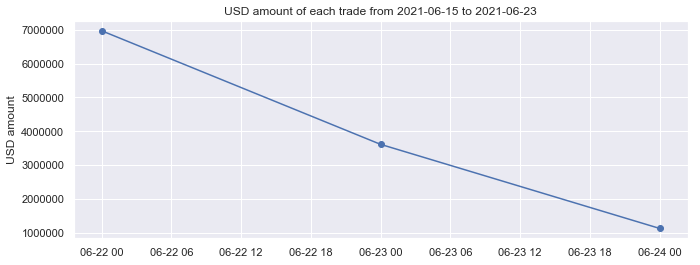

In [97]:
fig, ax = plt.subplots()
ax.plot(df2['USD amount'].sum(), marker='o', linestyle='-')
ax.set_ylabel('USD amount')
ax.set_title('Total USD amount of all trades for the past three days')